# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Data preparation
Let's start by loading the dataset, renaming column for clarity, handling missing values, and removing duplicates.

In [25]:
#import neccesary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Load the dataset
df = pd.read_excel(r"C:\Users\HP\Documents\GitHub\Online Retail.xlsx")

# Display the first few rows to get an overview of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
# Take a closer look at the dataset to understand its structure and characteristics.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [28]:
# Check for duplicates
df.duplicated().sum()

5268

In [29]:
# Rename columns for clarity
df1 = df.rename(columns= {'InvoiceNo': 'invoice_no',
                          'StockCode': 'stock_code',
                          'Description': 'description',
                          'Quantity': 'quantity',
                          'InvoiceDate': 'invoice_date',
                          'UnitPrice': 'unit_price',
                          'CustomerID': 'customer_id',
                          'Country': 'country'})

# Handle negative values in quantity and unit_price
df1['quantity'] = df1['quantity'].abs()
df1['unit_price'] = df1['unit_price'].abs()

# Remove duplicate rows
df1.drop_duplicates(inplace= True)

# Remove rows with missing customer_id values
df1.dropna(subset=['customer_id'], how='all', inplace=True)

# Display summary statistics for the dataset
df1.describe(include= 'all')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
count,401604.0,401604,401604,401604.000000,401604,401604.000000,401604.000000,401604
unique,22190.0,3684,3896,NaN,NaN,NaN,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,542.0,2065,2058,NaN,NaN,NaN,NaN,356728
mean,NaN,NaN,NaN,13.542995,2011-07-10 12:08:23.848567552,3.474064,15281.160818,NaN
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,6.000000,2011-07-29 15:40:00,1.950000,15145.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [30]:
#Extract date and time components
df1['time'] = df1['invoice_date'].dt.time
df1['day'] = df1['invoice_date'].dt.strftime('%A')
df1['month'] = df1['invoice_date'].dt.strftime('%B')
df1['quarter'] = df1['invoice_date'].dt.quarter
df1['year'] = df1['invoice_date'].dt.year

# Convert the 'time' column to string type
df1['time'] = df1['time'].astype(str)

# Split the 'time' column into hours and minutes
time_parts = df1['time'].str.split(':')

# Extract hours and minutes
df1['hours'] = time_parts.str[0].astype(int)
df1['minutes'] = time_parts.str[1].astype(int)
df1['time_dec'] = (df1['hours'] + (df1['minutes'] / 60)).round(2)



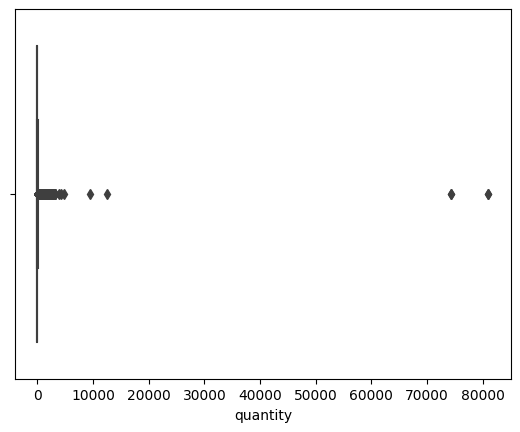

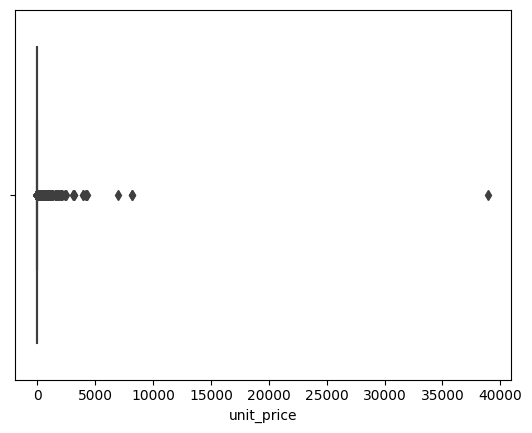

In [31]:
# Box plot for 'quantity'
sns.boxplot(x='quantity', data=df1)
plt.show()

# Box plot for 'unit_price'
sns.boxplot(x='unit_price', data=df1)
plt.show()

In [32]:
# Calculate the top 0.1 percent cutoff for 'Quantity'
quantity_cutoff = df1['quantity'].quantile(0.99)

# Calculate the top 0.1 percent cutoff for 'UnitPrice'
unitprice_cutoff = df1['unit_price'].quantile(0.99)

# Remove outliers in 'Quantity' and 'UnitPrice'
df2 = df1[(df1['quantity'] <= quantity_cutoff) & (df1['unit_price'] <= unitprice_cutoff)]


## Exploratory Data Analysis (EDA)
### Data Statistics and Visualization
Let's start by exploring basic statistics of the dataset and visualizing the correlation matrix

In [33]:
# Calculate basic statistics and visualize the correlation matrix
df2.describe()

,quantity,invoice_date,unit_price,customer_id,quarter,year,hours,minutes,time_dec
count,393737.000000,393737,393737.000000,393737.000000,393737.000000,393737.000000,393737.000000,393737.000000,393737.000000
mean,9.946292,2011-07-10 14:10:50.313432576,2.760503,15289.011564,2.851858,2010.934291,12.737254,30.402175,13.243908
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000,1.000000,2010.000000,6.000000,0.000000,6.170000
25%,2.000000,2011-04-06 15:02:00,1.250000,13959.000000,2.000000,2011.000000,11.000000,16.000000,11.700000
50%,6.000000,2011-07-31 10:59:00,1.950000,15152.000000,3.000000,2011.000000,13.000000,31.000000,13.170000
75%,12.000000,2011-10-20 12:13:00,3.750000,16791.000000,4.000000,2011.000000,14.000000,45.000000,14.830000
max,125.000000,2011-12-09 12:50:00,15.000000,18287.000000,4.000000,2011.000000,20.000000,59.000000,20.630000
std,14.666189,NaN,2.584737,1710.466103,1.121962,0.247773,2.283250,17.083433,2.265902


In [34]:
# Calculate the correlation matrix
df2[['quantity', 'unit_price']].corr()


,quantity,unit_price
quantity,1.000000,-0.252401
unit_price,-0.252401,1.000000


<Axes: xlabel='unit_price', ylabel='quantity'>

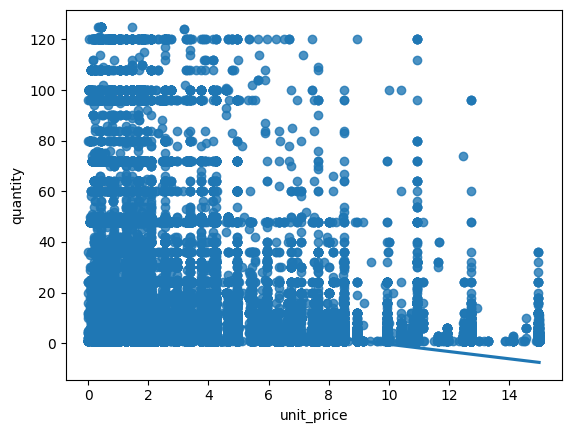

In [35]:
# Create a regression plot to explore the relationship between 'quantity' and 'unit_price'
sns.regplot(data= df2, y= 'quantity', x= 'unit_price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Purchased')
plt.title('relationship between Quantity and unit price')
plt.show()

In [64]:
# Group the data by 'customer_id' and count the number of unique invoices for each customer
customer_retention = df1.groupby('customer_id')['invoice_no'].nunique().reset_index()

# Calculate the number of customers who made multiple purchases (repeat customers)
repeat_customers = customer_retention[customer_retention['invoice_no'] > 1]

# Calculate the overall customer retention level
retention_level = len(repeat_customers) / len(customer_retention) * 100

# Print the overall customer retention level
print(f"Overall Customer Retention Level: {retention_level:.2f}%")


Overall Customer Retention Level: 69.97%


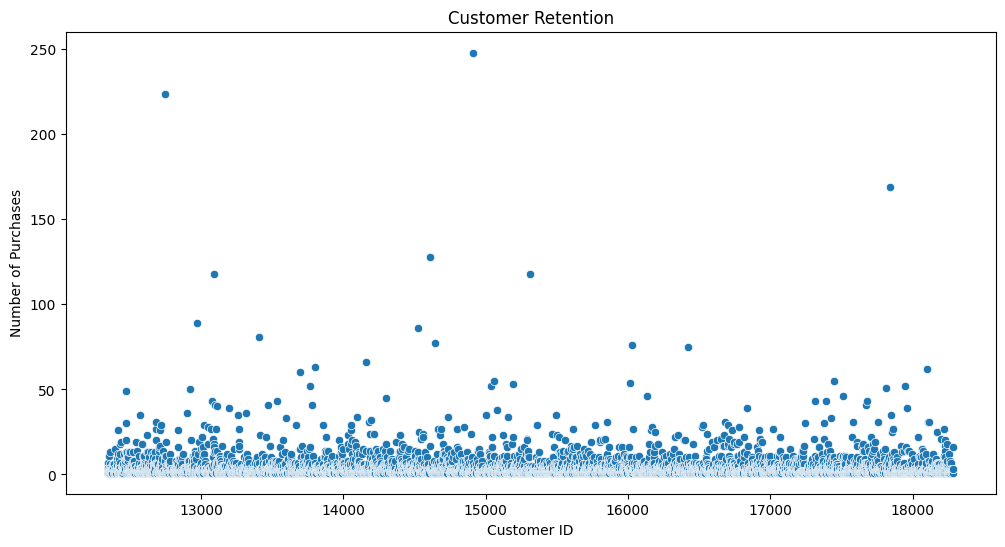

In [65]:
# Create a scatter plot to visualize customer retention
plt.figure(figsize=(12, 6))
sns.scatterplot(x='customer_id', y='invoice_no', data=customer_retention)
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.title('Customer Retention')
plt.show()


In [78]:
# Calculate the length of each description and add it as a new column to your DataFrame
df1['len_desc'] = df1['description'].apply(lambda x: len(str(x)))

# Create a mask to filter for first-time purchases (unique customers)
first_time_purchases = df1.groupby('customer_id')['invoice_no'].transform('nunique') == 1

# Group the data by description length and count the number of unique customers who made first-time purchases
customers_by_description_length = df1[first_time_purchases].groupby('len_desc')['customer_id'].nunique().reset_index()

# Calculate the correlation matrix
customers_by_description_length[['len_desc', 'customer_id']].corr()

,len_desc,customer_id
len_desc,1.000000,0.923071
customer_id,0.923071,1.000000


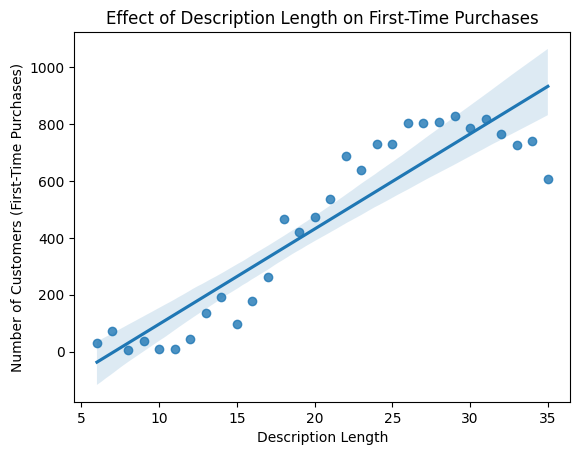

In [79]:
# Plot the results to visualize the relationship
sns.regplot(x='len_desc', y='customer_id', data=customers_by_description_length)
plt.xlabel('Description Length')
plt.ylabel('Number of Customers (First-Time Purchases)')
plt.title('Effect of Description Length on First-Time Purchases')
plt.show()


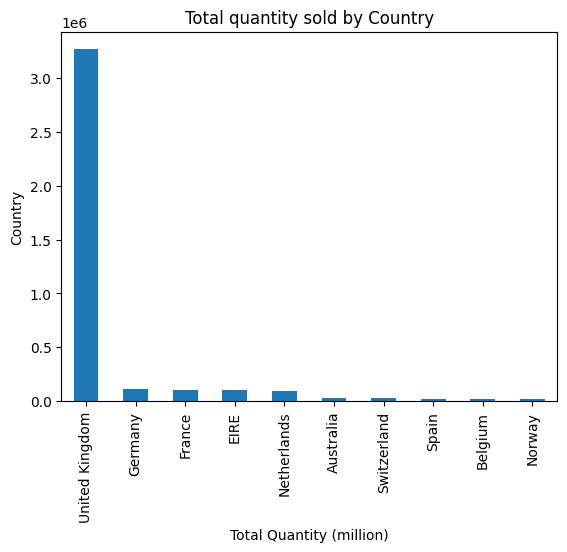

In [57]:
# Calculate and plot the total quantity sold by the top 20 countries
top_10_country = df2.groupby('country')['quantity'].sum().nlargest(10)
top_10_country.plot(kind='bar')
plt.ylabel('Country')
plt.xlabel('Total Quantity (million)')
plt.title('Total quantity sold by Country')
plt.show()


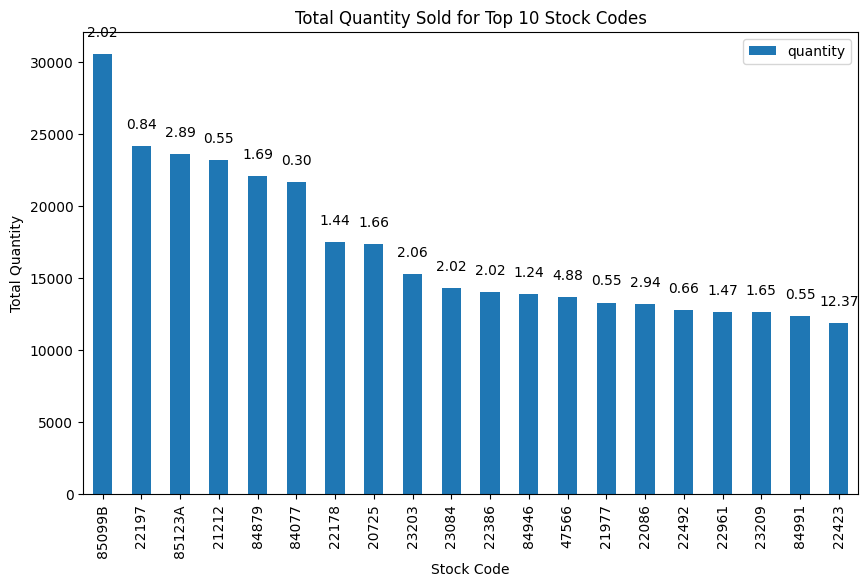

In [56]:
# Calculate and visualize total quantity by day of the week
top_10_stock = df2.groupby('stock_code').agg({'quantity': 'sum', 'unit_price': 'mean'}).nlargest(20, 'quantity')
ax = top_10_stock.plot(kind='bar', y='quantity', rot=0, figsize=(10, 6))
plt.xlabel('Stock Code')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.title('Total Quantity Sold for Top 10 Stock Codes')

# Display unit price on top of each bar
for i in range(len(top_10_stock)):
    ax.text(i, top_10_stock['quantity'].iloc[i] + 1000, f"{top_10_stock['unit_price'].iloc[i]:.2f}", ha='center', va='bottom')

plt.show()


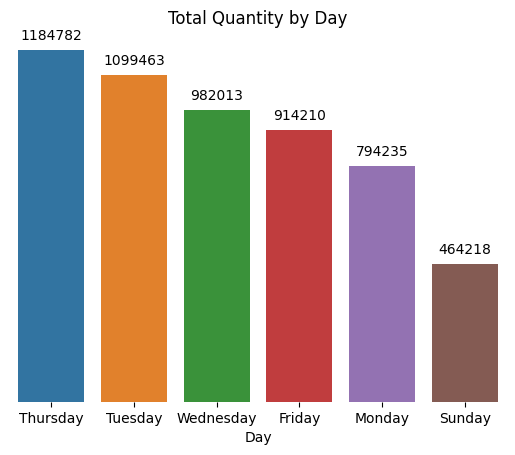

In [69]:
# Calculate and visualize total quantity by day
day_quantity_sum = df1.groupby('day')['quantity'].sum().reset_index()
day_quantity_sum = day_quantity_sum.sort_values(by='quantity', ascending=False)
# Create a barplot for the sum of 'quantity' by 'month'
ax = sns.barplot(x='day', y='quantity', data=day_quantity_sum)
plt.xlabel('Day')
plt.ylabel('')
ax.set(yticks=[])
plt.title('Total Quantity by Day')
# Add total quantity on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
# Remove the frame or rectangle around the chart
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

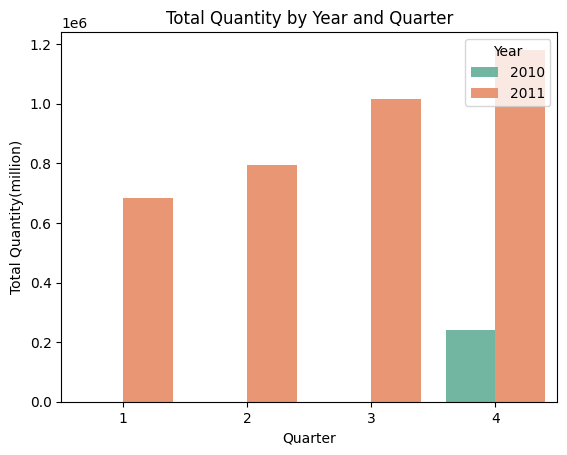

In [43]:
total_quantity_by_year_quarter = df2.groupby(['year', 'quarter'])['quantity'].sum().reset_index()
# Create a pivot table from the total_quantity_by_year_quarter DataFrame
pivot_table = total_quantity_by_year_quarter.pivot_table(index='quarter', columns='year', values='quantity', fill_value=0)

# Create a bar chart to visualize total quantity by year and quarter
sns.barplot(x='quarter', y='quantity', hue='year', data=total_quantity_by_year_quarter, palette='Set2')
plt.title('Total Quantity by Year and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity(million)')
plt.legend(title='Year')
plt.show()

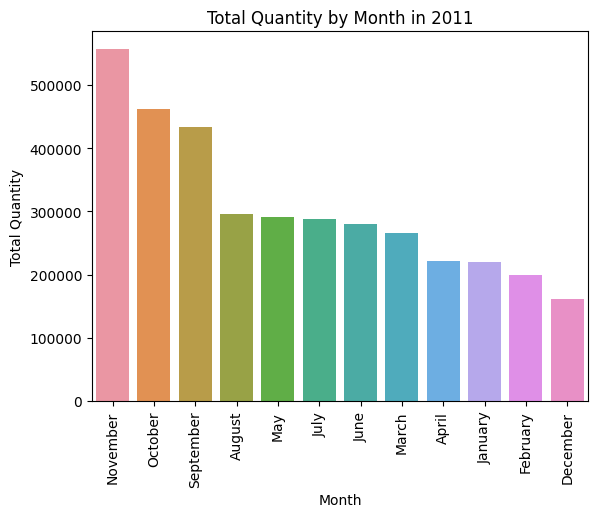

In [44]:
# Filter the DataFrame to include only data for the year 2011
df_2011 = df2[df2['year'] == 2011]

# Group by 'month' and calculate the total quantity for 2011
monthly_quantity_sum_2011 = df_2011.groupby('month')['quantity'].sum().reset_index()

# Sort the DataFrame by the total quantity in descending order
monthly_quantity_sum_2011 = monthly_quantity_sum_2011.sort_values(by='quantity', ascending=False)

# Create a bar chart
sns.barplot(x='month', y='quantity', data=monthly_quantity_sum_2011)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Month in 2011')
plt.show()

In [81]:
# Investigating why december have the lowest quantity sold
df1.tail().sort_values(by= 'time', ascending = True )

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,time,day,month,quarter,year,hours,minutes,time_dec,len_desc
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12:50:00,Friday,December,4,2011,12,50,12.83,27
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12:50:00,Friday,December,4,2011,12,50,12.83,28
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,Friday,December,4,2011,12,50,12.83,29
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,Friday,December,4,2011,12,50,12.83,31
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12:50:00,Friday,December,4,2011,12,50,12.83,29


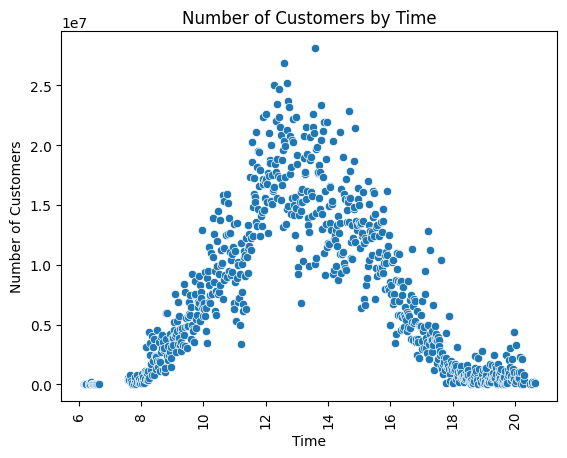

In [70]:
# Group by 'time_dec' and count the unique customers for each minute
users_by_time = df1.groupby('time_dec')['customer_id'].sum().reset_index()

# Create a scatter plot to show the number of unique customers by time
sns.scatterplot(x='time_dec', y='customer_id', data=users_by_time)
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Time')
plt.show()


## Recommendations

### 1. Investigate Saturday Sales

Analyze the lack of sales on Saturdays to uncover the root causes. Investigate if it's due to operating hours, marketing, or customer preferences. Improve sales strategies accordingly.

### 2. Enhance Customer Satisfaction and Loyalty

Implement a customer rating and feedback system. This empowers customers to provide feedback, enabling us to identify areas for improvement. Develop a loyalty program to offer incentives, like discounts, exclusive deals, and early sale access to repeat customers.

### 3. Optimize Sales for Different Times

Develop time-specific promotions for mornings and nights. This will better serve international customers in different time zones, potentially boosting sales during those periods.

### 4. Adjust Pricing Strategies

Leverage the insight that lower-priced items tend to be purchased in larger quantities. Offer discounts on higher-priced items to encourage larger purchases.

### 5. Enhance Weekend Sales

Analyze and enhance marketing strategies for Fridays and Sundays, the days with the lowest sales. Introduce special promotions or product availability improvements on these days.

### 6. Expand Global Reach

While expanding into new markets, focus on diversifying sales beyond the United Kingdom. This will reduce dependence on a single market and enhance the company's global footprint.

### 7. Lengthen Product Descriptions

Invest in longer product descriptions. This practice has shown to attract more first-time customers, potentially boosting sales.

## Conclusion

This analysis provides insights to enhance customer satisfaction, loyalty, and profitability. Implementation of these recommendations will drive success in the competitive online retail market.
